# Lending Club Case Study

#### Aim and Problem Statement: To identify driving factors which can be either consumer attributes or loan attributes

In [2]:
#Import required Libraries
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
import numpy as np
import pandas as pd
warnings.filterwarnings(action='ignore') #to ignore warnings
pd.set_option('display.max_columns', None) #to display all columns
pd.set_option('display.max_rows',None) #to display all rows
plt.rcParams["figure.figsize"] = [10, 3]

## Data Cleaning

We need to identify the driving variables responsible for loan default. Hence we can remove the irrelavant columns from our dataset
1. Remove the columns with all null values
2. Remove duplicates
3. Remove columns which are not relavant for analysis eg id, member id, etc


In [46]:
#Read the csv file and store it
data = pd.read_csv('loan.csv', header = 0)
print(data.shape)
# to drop columns with all null values
data.dropna(axis=1, how='all', inplace= True) 
print(data.shape)
# to drop duplicates
remove_col = ['id', 'member_id','emp_title', 'url', 'desc', 'title', 'zip_code']
data.drop(axis=1,labels=remove_col,inplace=True)
default_set = data.loc[data['loan_status']=='Charged Off'].drop_duplicates() 
default_set = default_set.replace("", np.nan)
print(default_set.shape)
plt.style.use('ggplot')

(39717, 111)
(39717, 57)
(5627, 50)


## Dataset

In [111]:
default_set.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
24437,10000,10000,9796.198894,36 months,6.54%,306.68,A,A4,6 years,MORTGAGE,92040.0,Verified,Oct-10,Charged Off,n,credit_card,CA,10.07,0,Dec-96,3,NaN,NaN,15,0,22595,34%,32,f,0.0,0.0,8722.47,8543.01,7595.47,990.64,0.0,136.36,2.1500,Apr-13,26.60,NaN,Aug-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
7675,14000,14000,14000.000000,36 months,7.49%,435.43,A,A4,NaN,MORTGAGE,66000.0,Verified,Sep-11,Charged Off,n,credit_card,AZ,15.27,0,Jul-72,0,NaN,NaN,9,0,16041,72.60%,24,f,0.0,0.0,7427.00,7427.00,5829.94,1128.30,0.0,468.76,4.8200,Feb-13,435.43,NaN,Sep-15,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
24805,6000,6000,6000.000000,36 months,7.88%,187.69,A,A5,10+ years,MORTGAGE,35000.0,Not Verified,Oct-10,Charged Off,n,debt_consolidation,FL,20.16,0,Apr-91,0,NaN,NaN,10,0,13571,68.50%,28,f,0.0,0.0,1686.96,1686.96,1368.38,318.58,0.0,0.00,0.0000,Jul-11,187.69,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
7783,5000,5000,5000.000000,36 months,7.49%,155.51,A,A4,4 years,RENT,75000.0,Not Verified,Sep-11,Charged Off,n,small_business,CA,9.06,0,Sep-89,0,NaN,NaN,16,0,11502,49%,16,f,0.0,0.0,955.84,955.84,137.15,152.83,15.0,650.86,117.1548,Mar-12,150.00,NaN,Apr-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
7798,7100,7100,7100.000000,36 months,6.99%,219.20,A,A3,2 years,RENT,50400.0,Source Verified,Sep-11,Charged Off,n,major_purchase,CA,0.14,0,Nov-02,0,NaN,NaN,4,0,6,0.10%,8,f,0.0,0.0,5513.25,5513.25,4434.28,716.57,0.0,362.40,3.6240,Oct-13,274.36,NaN,Feb-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


## Univariate Analysis

### Interest rate Vs Defaulter Frequency

<Axes: title={'center': 'Interest Rate Vs Defaulter Freq'}, xlabel='int_rate', ylabel='No of defaulters'>

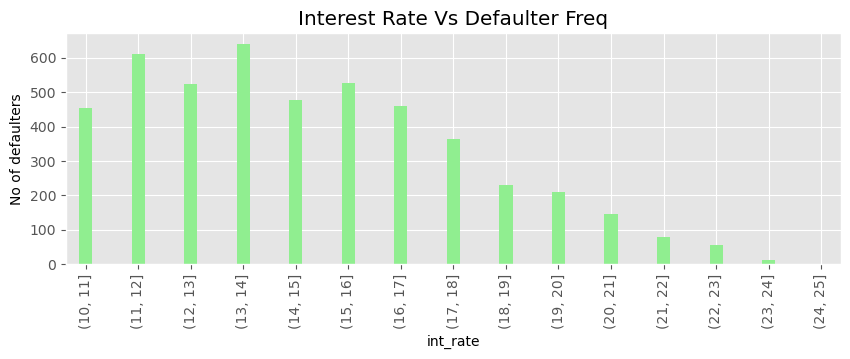

In [106]:
#Interest rate Vs Defaulters -->Identify the max defaulters under rate of interest
rate_defaulters = default_set.filter(items=["int_rate"])
rate_defaulters["int_rate"]=rate_defaulters["int_rate"].str.replace("%","")
rate_defaulter["int_rate"] = pd.to_numeric(rate_defaulters["int_rate"], errors='coerce')
bins=list(range(10,26,1))
rate_vs_defaulter = rate_defaulter.groupby(pd.cut(rate_defaulter.int_rate, bins)).count()
rate_vs_defaulter.plot(kind="bar", title="Interest Rate Vs Defaulter Freq", ylabel = "No of defaulters", width = 0.25,
                       color = "lightgreen")

#### Conclusions obtained :-
#### From Interest rates 10% to 15% the defaulter frequency slightly increases and reaches peak high at 14%
#### Tendancy of defaulter decreases after 16% 
#### From 16% onwards, the higher the interest rates, lower the defaulters

### Annual Income of defaulters

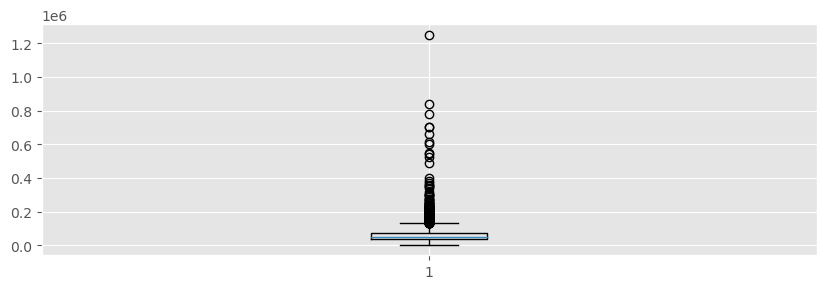

In [48]:
#Income Vs Defaulters -->Identify the defaulters under an income range
inc_defaulter = default_set.filter(items=["annual_inc"])
plt.boxplot(inc_defaulter)
plt.show()
#The Below box plot indicates that there is a lot of outliers

## Remove Outliers using Interquartile Range

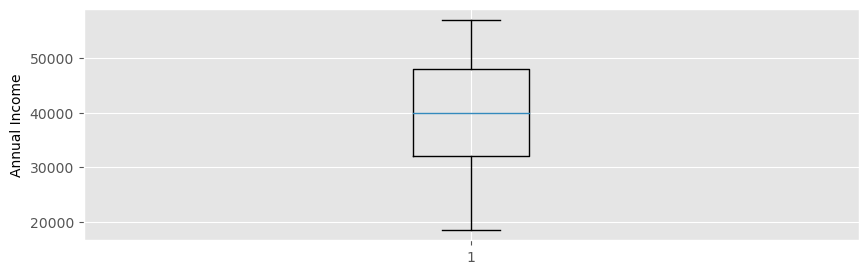

In [113]:
#Remove outliers using Interquartile range
Q1 = np.percentile(inc_defaulter["annual_inc"], 25, method='midpoint')
Q3 = np.percentile(inc_defaulter["annual_inc"], 75, method='midpoint')
IQR = Q3 - Q1
annual_inc_vs_defaulters = inc_defaulter[(inc_defaulter["annual_inc"].between(0.5*Q1,1.5*IQR))]
plt.boxplot(annual_inc_vs_defaulters)
plt.ylabel("Annual Income")
plt.show()

### State Vs Defaulter Frequency

<Axes: title={'center': 'State Vs Defaulters'}, xlabel='addr_state', ylabel='No of defaulters'>

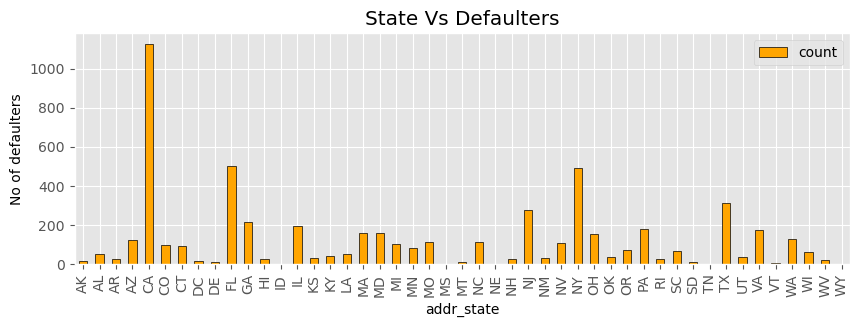

In [50]:
#State Vs Defaulter Frequency -->Identify the no of defaulters per state Categorical data
state_defaulters = default_set.groupby('addr_state').size().reset_index(name='count')
state_defaulters.set_index(["addr_state"], inplace = True)
state_defaulters.plot(kind="bar", title="State Vs Defaulters", 
                      ylabel = "No of defaulters", color='orange', edgecolor = "black")


#### Conclusions obtained :-
#### Defaulters are Highest in state CA. 
#### Defaulters in states FL, NY rank next
#### While giving loans to these states, probably we should think to change the interest rates

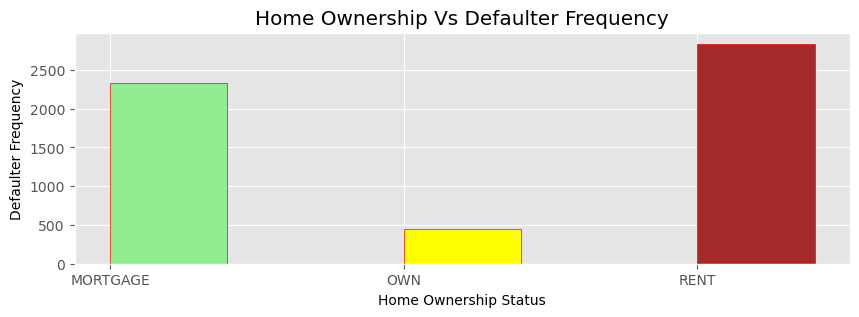

In [51]:
#HomeOwnership of Defaulters
owner_set=default_set.groupby('home_ownership').size().reset_index(name='count')
home_owner_status = owner_set[(owner_set['home_ownership'].isin(['MORTGAGE', 'RENT', 'OWN']))]
xaxis=home_owner_status["home_ownership"]
yaxis=home_owner_status["count"]
c = ['lightgreen', 'yellow', 'brown']
plt.bar(xaxis, yaxis, width = 0.4, color = c, align ="edge", edgecolor = "red")
plt.title("Home Ownership Vs Defaulter Frequency")
plt.xlabel("Home Ownership Status")
plt.ylabel("Defaulter Frequency")
plt.show()

#### Conclusions obtained :-
#### Those who stay in rented house seems to be having more defaulter tendancy compared to those who owns a home 
#### Those who owns a house, it seems less defaulter tendancy compared to rented and mortgaged homes

<function matplotlib.pyplot.show(close=None, block=None)>

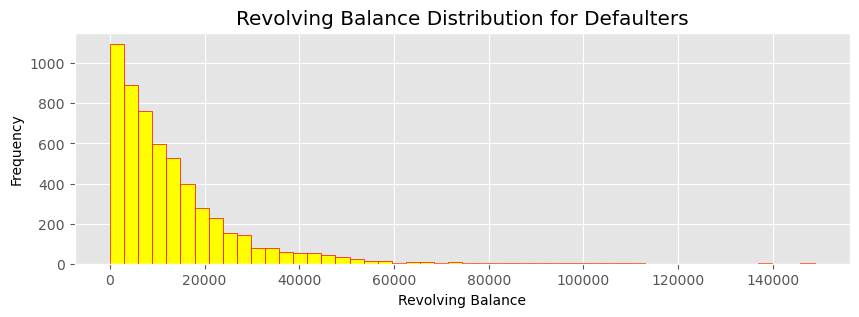

In [52]:
#Revolving Balance Vs Defaulter Frequency
rev_balance = default_set.filter(items=["revol_bal"])
plt.title("Revolving Balance Distribution for Defaulters")
plt.xlabel("Revolving Balance")
plt.ylabel("Frequency")
plt.hist(rev_balance, bins=50, edgecolor="red", color = "yellow")
plt.show

#### Conclusions obtained :-
#### when the Revolving balance of a consumer is the lowest, the higher the chance to be a defaulter 
#### Those who have highest revolving balance seems to be a less chance to become a defaulter

<function matplotlib.pyplot.show(close=None, block=None)>

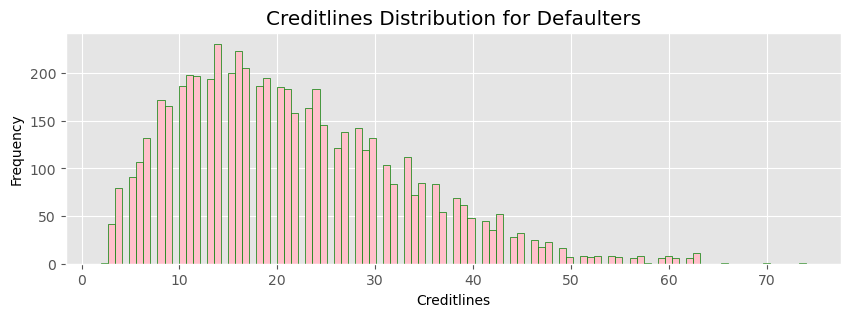

In [53]:
#Total No of Creditlines Vs Defaulter Frequency
credit_lines = default_set.filter(items=["total_acc"])
plt.title("Creditlines Distribution for Defaulters")
plt.xlabel("Creditlines")
plt.ylabel("Frequency")
plt.hist(credit_lines, bins=100, edgecolor="green", color = "pink")
plt.show

#### Conclusions obtained :-
#### As the creditlines increases, the defaulter count also increases and then it seems to be decreasing
#### Those who have creditlines above 15 seems to be showing a lesser defaulter tendancy
#### Those who have creditlines below 15 seems to be showing a higher defaulter tendancy

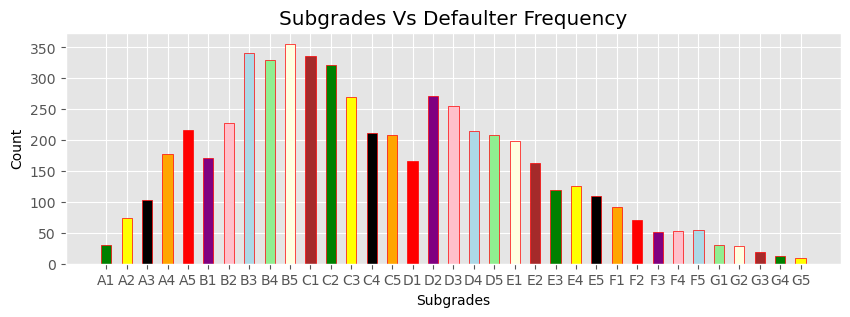

In [54]:
#subgrade vs Defaulter Frequency
sub_grades = default_set.groupby('sub_grade').size().reset_index(name='count')
plt.title("Subgrades Vs Defaulter Frequency")
plt.xlabel("Subgrades")
plt.ylabel("Count")
xaxis=sub_grades["sub_grade"]
yaxis=sub_grades["count"]
c = ['green', 'yellow', 'black', 'orange', 'red', 'purple','pink', 'lightblue','lightgreen','lightyellow','brown']
plt.bar(xaxis, yaxis, width = 0.5, color = c, align ="center", edgecolor = "red")
plt.show()

#### Conclusions obtained :-
#### The defaulters are highest for sub-grade B3 to C3, B5 being the highest defaulter frequency
#### Subgrades G1 to G5 having the lowest no of defaulters

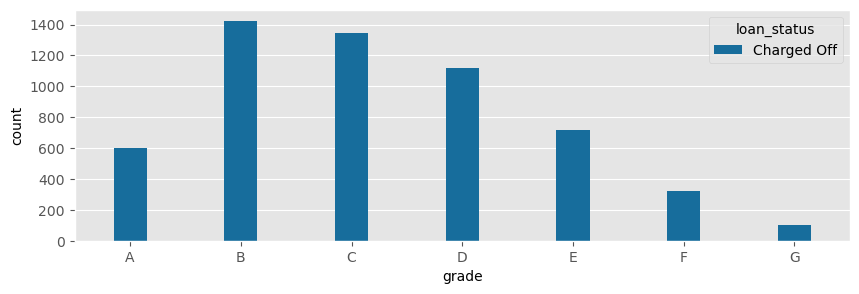

In [78]:
default_set.sort_values(by = ["grade"], inplace =True)
sns.countplot(data = default_set, x = 'grade', hue = 'loan_status', palette='colorblind', width = 0.3)
plt.show()


#### Conclusions obtained :-
#### The defaulters are highest for grade B
#### Grades D to Grade G, the defaulter count is decreasing
#### Grade G is having the lowest defaulters

# Bivariate Analysis

#### Annual Income vs Loan Purpose of Defaulters

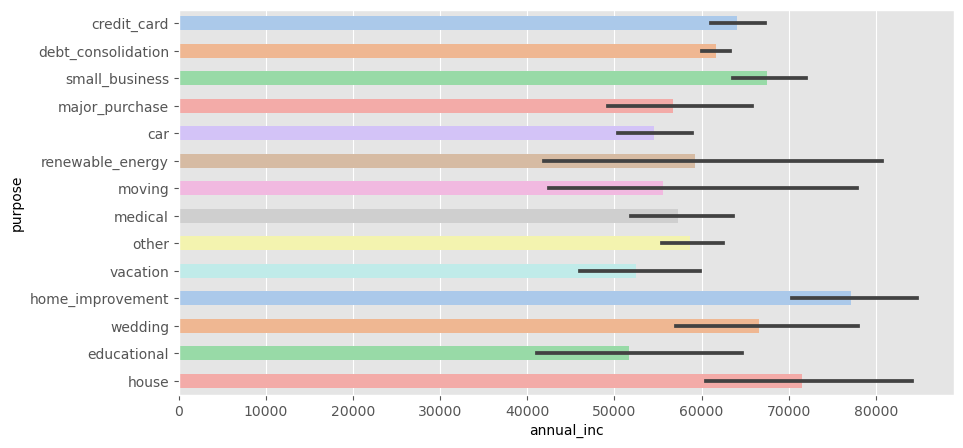

In [110]:
plt.figure(figsize=(10,5))
sns.barplot(data =default_set,x='annual_inc', y='purpose', palette="pastel", width = 0.5)
plt.show()

#### Interest rate distribution Vs grades

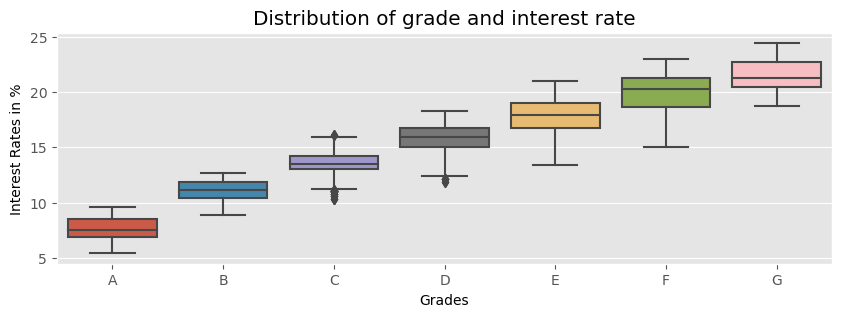

In [56]:
#interest rate distribution Vs grades
grade_vs_rate = default_set.filter(items=["int_rate","grade"])
#Remove last character % and convert the string to float dtype
grade_vs_rate["int_rate"] = grade_vs_rate["int_rate"].apply(lambda x: float(x[:-1]))
grade_vs_rate.sort_values(by = ["grade"], inplace =True)
sns.boxplot(data = grade_vs_rate, x = 'grade', y = 'int_rate')
plt.title('Distribution of grade and interest rate')
plt.xlabel('Grades')
plt.ylabel('Interest Rates in %')
plt.savefig('Grade_Rates')
plt.show()

#### Conclusions obtained :-
#### Interest rates are increasing from Grades A to G

#### Annual Income vs Home Ownership of Defaulters

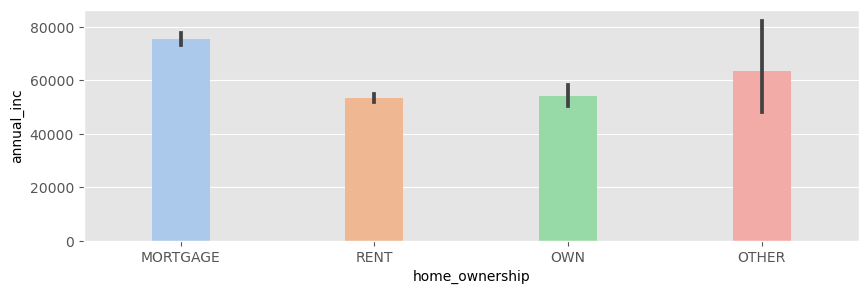

In [86]:
plt.figure(figsize=(10,3))
sns.barplot(data =default_set,x='home_ownership', y='annual_inc', palette="pastel" , width = 0.3)
plt.show()

#### Conclusions obtained :-
#### Those who have high annual income are having mortgaged home owner 
#### Middle income range consumers are staying either in rented home or own home

#### Loan Amount Vs Loan Purpose of Defaulters

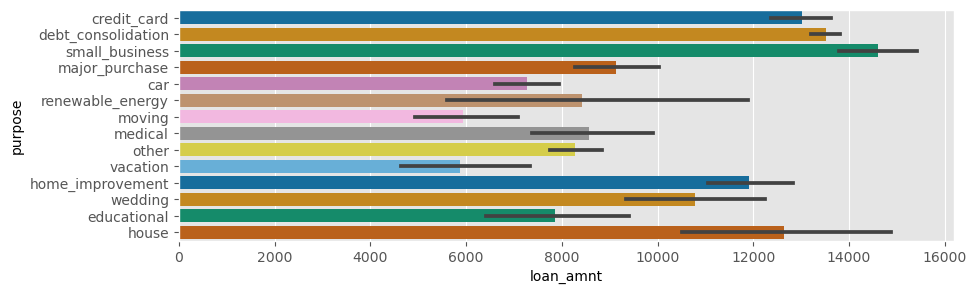

In [82]:
#Loan Amount Vs Loan Purpose
plt.figure(figsize=(10,3))
sns.barplot(data =default_set,x='loan_amnt', y='purpose', palette="colorblind")
plt.show()

#### Loan Amount vs House Ownership of Defaulters

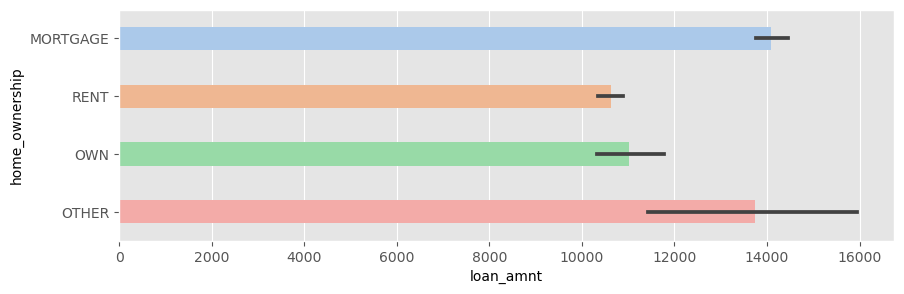

In [105]:
plt.figure(figsize=(10,3))
sns.barplot(data =default_set,x='loan_amnt', y='home_ownership',palette="pastel", width = .4)
plt.show()

#### Loan Amount vs Employment Length of defaulters

<Axes: xlabel='emp_length', ylabel='loan_amnt'>

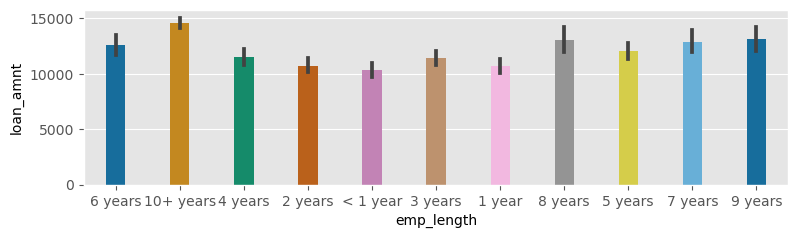

In [103]:
plt.figure(figsize=(20,5))
plt.subplot(221)
sns.barplot(data =default_set,y='loan_amnt', x='emp_length', palette="colorblind" , width = .3)

#### Conclusions obtained :-
#### The loan amount is higher who has employment length of 4 to 10 years

#### Loan Amount vs Verification Status of Defaulters

<Axes: xlabel='verification_status', ylabel='loan_amnt'>

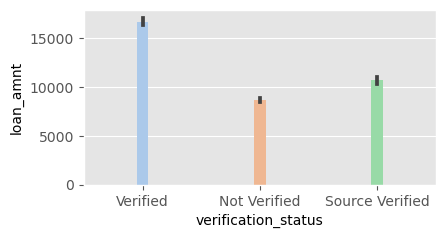

In [102]:
plt.figure(figsize=(10,5))
plt.subplot(222)
sns.barplot(data =default_set,y='loan_amnt', x='verification_status', palette="pastel", width = .1)

#### Conclusions obtained :-
#### The verified consumers has got highest loan amount compared to non verified consumers

#### Most of loan applicants are either rented or mortaged.
#### Maximum of loan application are for credit card payment and debt cansolidation.
#### Home improvement and major purchages are other popular reasons of laon application.
#### Most applicants are from California state and then New York and Texas.
#### Majority of loan applicants are vastly expericneced professional, i.e. more than 10 years.
#### Most people have multiple credit lines linked with them.